<a href="https://www.kaggle.com/code/celalngr/friends-series-exploratory-data-analysis?scriptVersionId=218087969" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Friends Expanatory Data Analysis

This dataset provides a comprehensive breakdown of the iconic TV show Friends, which aired from 1994 to 2004. It includes detailed information across all 10 seasons, offering insights into production details, episode plots, and viewer engagement throughout the series.


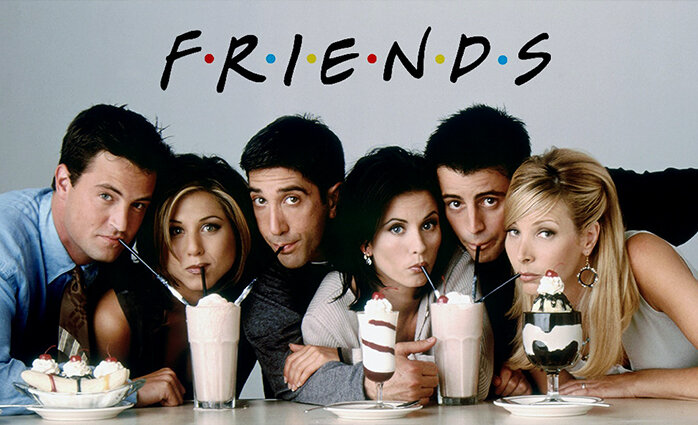
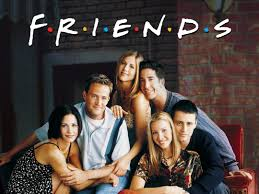

## Analysis Content

1. [Python Libraries](#1)
2. [Data Content](#2)
3. [Data Analysis and Import](#3)
4. [How Many Episodes Are There In Each Season?](#4)
5. [Seasons and Total Points Received](#5)
6. [Seasons And Stars](#6)
7. [The director's relationship with the TV series](#7)
8. [Directors Who Made the Highest Stars](#8)
9. [Directors Who Made the Most Underrated Stars](#9)
10. [Highest Starring TV Series Episodes](#10)
11. [Episodes of TV Series with the Least Starring](#11)
12. [Episode with the Highest Star and Episode with the Lowest Star](#12)

<a id = "1"></a>
## Python Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/friends-dataset-1994-2004/friends_episodes_v3.csv


<a id = "2"></a>
## Data Content 

## The dataset contains the following columns:

* Year_of_prod: The year the episode was produced, highlighting the timeline of the series' development.
* Season: The season number, ranging from 1 to 10, to classify the episodes across the show's decade-long run.
* Episode_Number: The episode's position within each season, making it easy to track the sequence of episodes.
* Episode_Title: The official title of each episode, capturing the essence of its storyline.
* Duration: The runtime of each episode, typically around 22 minutes, but varying for special episodes.
* Summary: A brief plot summary providing an overview of the key events and themes of each episode.
* Director: The director(s) responsible for the episode’s creative direction, giving insight into the behind-the-scenes work.
* Stars: The main cast and guest stars featured in the episode, showcasing both regulars and notable guest appearances.
* Votes: Viewer ratings or votes from public platforms, representing audience engagement and reception of the episode.

<a id = "3"></a> 
## Data Analysis and Import

In [2]:
file_path = '/kaggle/input/friends-dataset-1994-2004/friends_episodes_v3.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [3]:
df.head()

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes
0,1994,1,1,The One Where Monica Gets a Roommate: The Pilot,22,"Monica and the gang introduce Rachel to the ""r...",James Burrows,8.3,7440
1,1994,1,2,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888
2,1994,1,3,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605
3,1994,1,4,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468
4,1994,1,5,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year_of_prod    236 non-null    int64  
 1   Season          236 non-null    int64  
 2   Episode Number  236 non-null    int64  
 3   Episode_Title   236 non-null    object 
 4   Duration        236 non-null    int64  
 5   Summary         236 non-null    object 
 6   Director        236 non-null    object 
 7   Stars           236 non-null    float64
 8   Votes           236 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 16.7+ KB


In [5]:
df.isnull().sum()

Year_of_prod      0
Season            0
Episode Number    0
Episode_Title     0
Duration          0
Summary           0
Director          0
Stars             0
Votes             0
dtype: int64

In [6]:
df.shape

(236, 9)

In [7]:
## Total number of sections
df.groupby("Season")[["Episode Number"]].value_counts().count()

236

In [8]:
df.dtypes

Year_of_prod        int64
Season              int64
Episode Number      int64
Episode_Title      object
Duration            int64
Summary            object
Director           object
Stars             float64
Votes               int64
dtype: object

<a id = "4"></a>
## How Many Episodes Are There In Each Season?

In [9]:
df['Season'].value_counts().sort_index()

Season
1     24
2     24
3     25
4     24
5     24
6     25
7     24
8     24
9     24
10    18
Name: count, dtype: int64

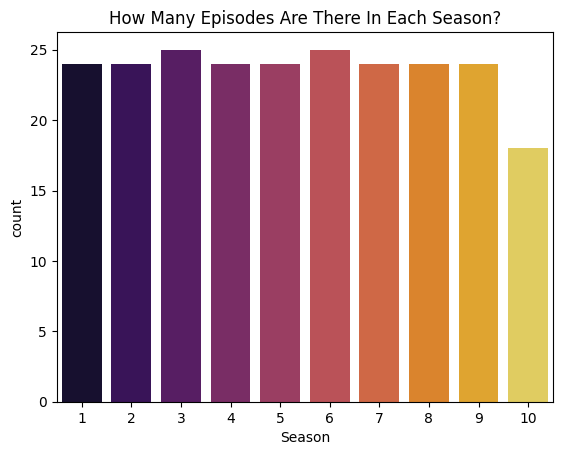

In [10]:
sns.countplot(x = "Season", data = df, palette = 'inferno')
plt.title("How Many Episodes Are There In Each Season?")
plt.show()

<a id = "5"></a>
## Seasons and Total Points Received

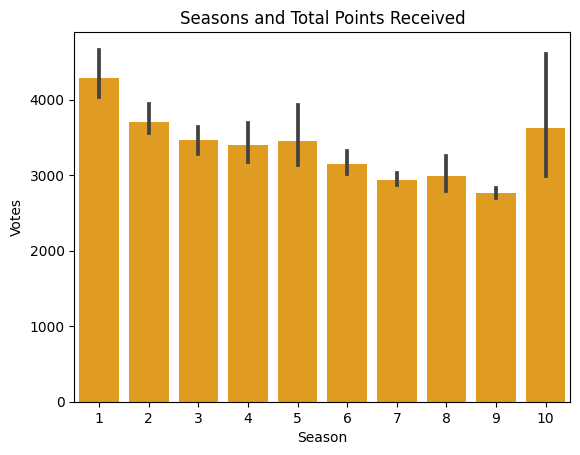

In [11]:
sns.barplot(x ="Season", y = "Votes", data = df,color='orange' )
plt.title("Seasons and Total Points Received")
plt.show()

* Total points received in seasons and standard deviations of this point are given.
* The season with the most points was: Season 1
* The season with the least points was: Season 9.

<a id = "6"></a>
## Seasons And Stars

In [12]:
df["Stars"].value_counts()

Stars
8.2    37
8.5    31
8.1    29
8.3    21
8.6    19
8.4    16
8.7    14
8.8    11
8.9    10
9.1     9
8.0     8
9.0     8
7.9     5
9.2     4
9.3     3
7.5     3
9.5     2
9.7     2
9.4     1
7.2     1
7.4     1
7.8     1
Name: count, dtype: int64

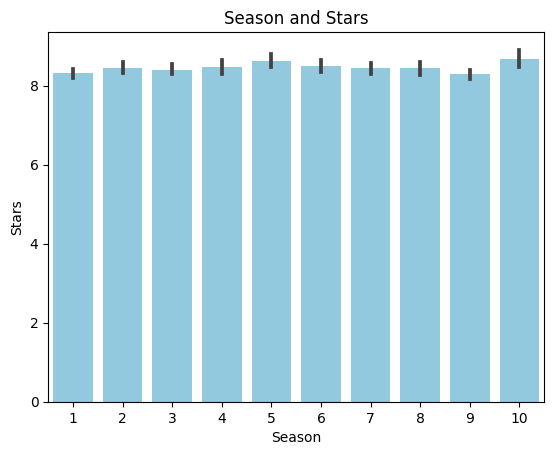

In [13]:
sns.barplot(x = "Season", y = "Stars",   data = df, color='skyblue')
plt.title("Season and Stars")
plt.show()

* The total Stars received in the seasons are given.
* The season with the most stars

<a id = "7"></a>
## The director's relationship with the TV series

#### Episode directors

In [14]:
df.Director.unique() 

array(['James Burrows', 'Pamela Fryman', 'Arlene Sanford', 'Peter Bonerz',
       'Paul Lazarus', 'Alan Myerson', 'Michael Lembeck', 'Gail Mancuso',
       'Robby Benson', 'Kevin Bright', 'Ellen Gittelsohn',
       'Mary Kay Place', 'Thomas Schlamme', 'Steve Zuckerman',
       'Terry Hughes', 'Sam Simon', 'Shelley Jensen', 'Gary Halvorson',
       'David Steinberg', 'Dana De Vally Piazza', 'Joe Regalbuto',
       'Andrew Tsao', 'Todd Holland', 'David Schwimmer', 'Ben Weiss',
       'Stephen Prime', 'Sheldon Epps', 'Roger Christiansen'],
      dtype=object)

####  Which director directed how many episodes in how many series?

In [15]:
df["Director"].value_counts() 

Director
Gary Halvorson          54
Kevin Bright            54
Michael Lembeck         24
James Burrows           15
Gail Mancuso            14
Peter Bonerz            12
Ben Weiss               10
David Schwimmer         10
Shelley Jensen           6
Robby Benson             6
Terry Hughes             5
Dana De Vally Piazza     3
Sheldon Epps             3
Alan Myerson             2
Thomas Schlamme          2
Roger Christiansen       2
Pamela Fryman            2
Steve Zuckerman          2
Ellen Gittelsohn         1
Sam Simon                1
David Steinberg          1
Joe Regalbuto            1
Andrew Tsao              1
Todd Holland             1
Paul Lazarus             1
Arlene Sanford           1
Stephen Prime            1
Mary Kay Place           1
Name: count, dtype: int64

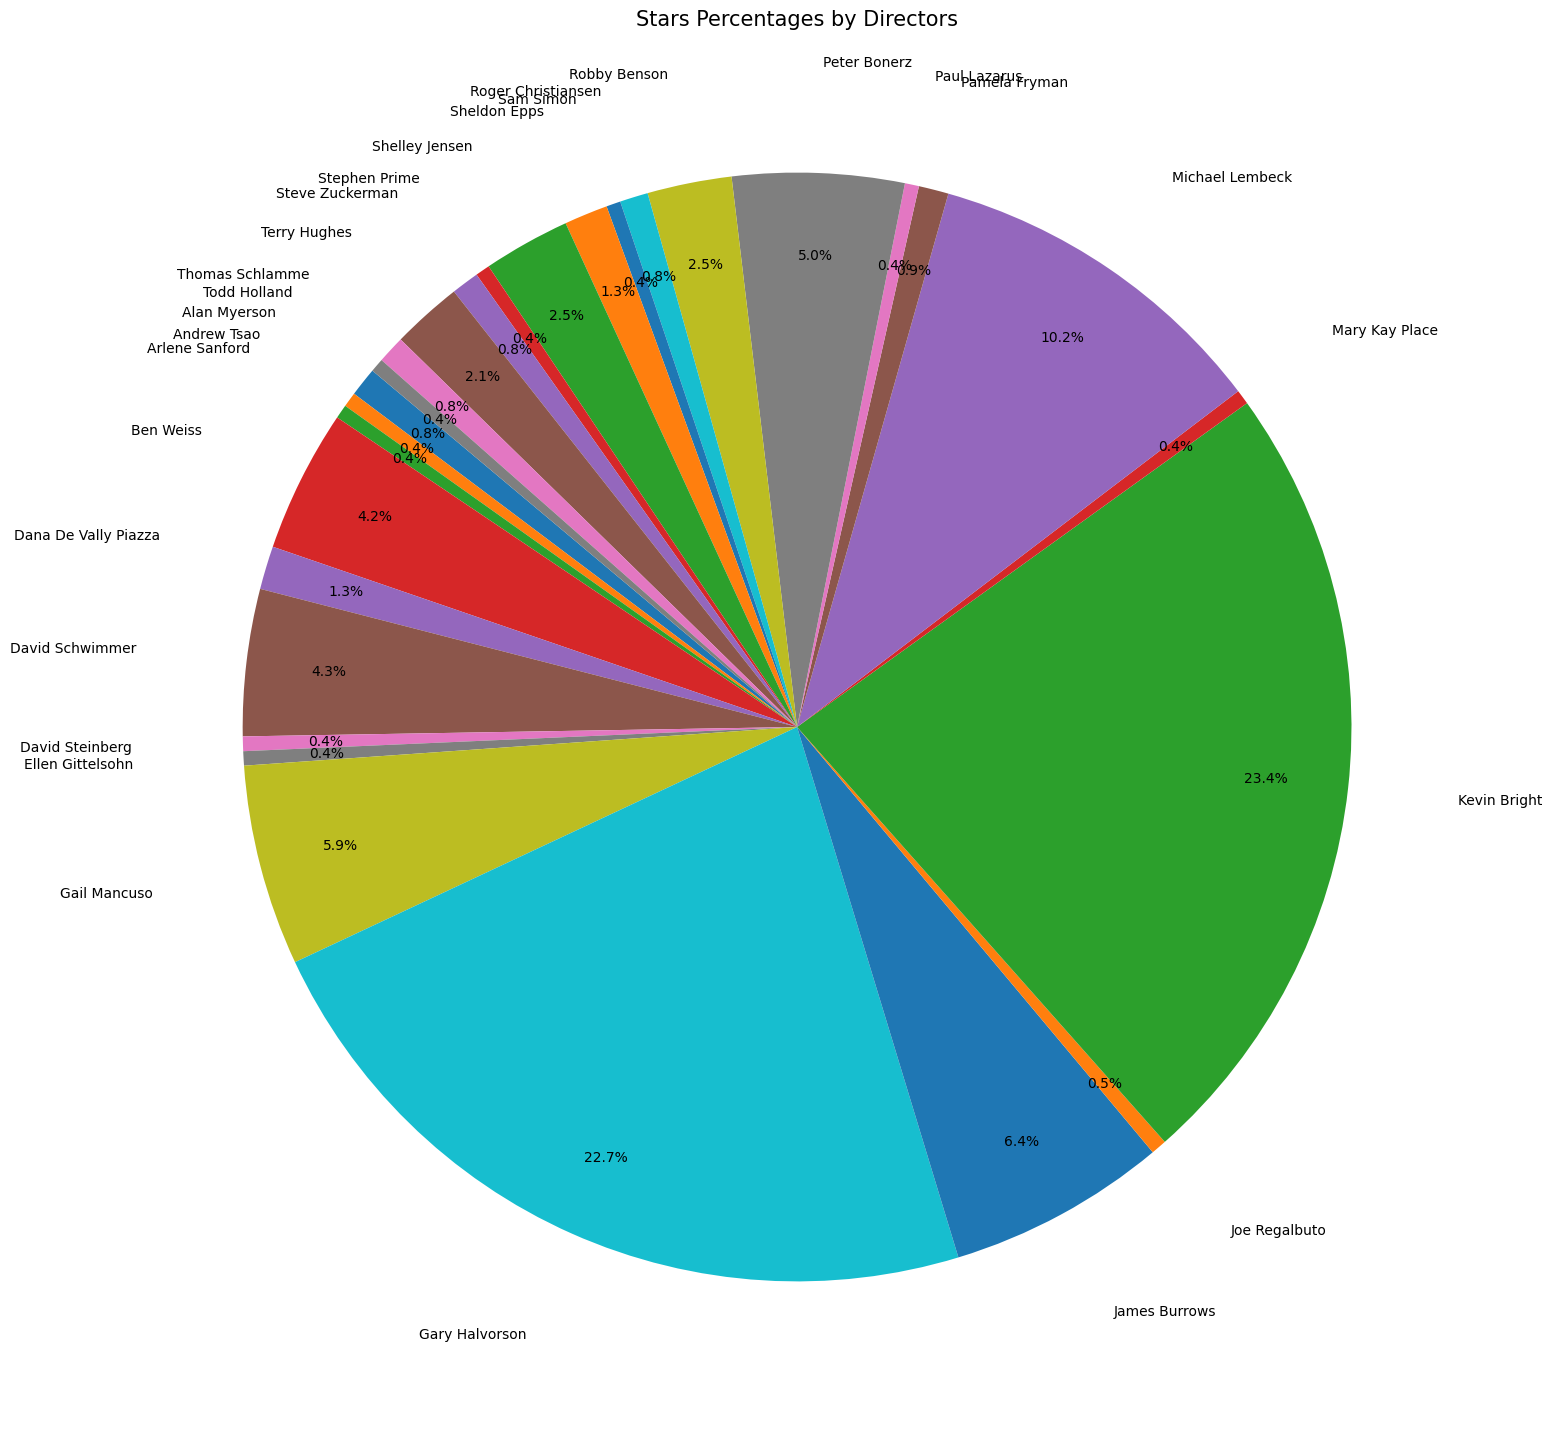

In [16]:
ratings_sum = df.groupby("Director")["Stars"].sum()
colors = plt.cm.Blues(np.linspace(0.3, 1, len(ratings_sum)))
plt.figure(figsize=(18, 18))
plt.pie(ratings_sum, labels=ratings_sum.index, autopct="%1.1f%%", startangle=140, labeldistance=1.2,pctdistance=0.85)
plt.title("Stars Percentages by Directors", fontsize=15)
plt.show()

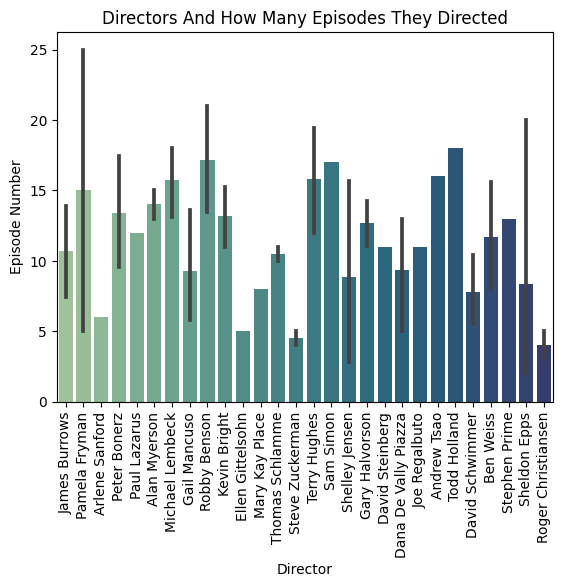

In [17]:
sns.barplot(x = "Director", y = "Episode Number", data = df,palette = "crest" );
plt.xticks(rotation=90);
plt.title("Directors And How Many Episodes They Directed")
plt.show()


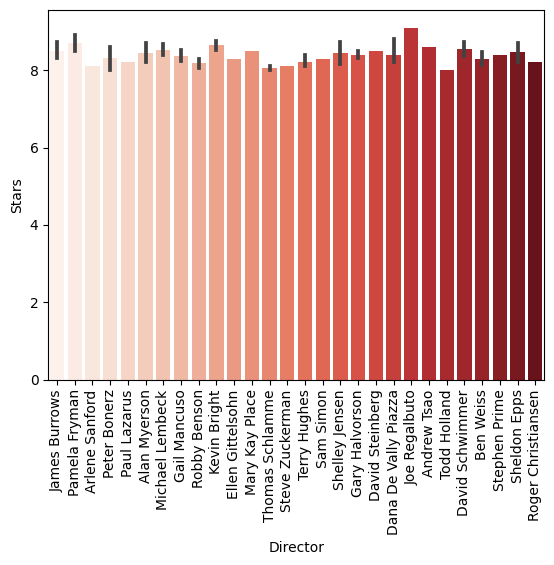

In [18]:
sns.barplot(x = "Director", y = "Stars", data = df, palette = "Reds");
plt.xticks(rotation=90);
plt.show()

<a id = "8"></a>
## Directors Who Made the Highest Stars

In [19]:
highest_rated_directors = df[['Stars', 'Director']].sort_values('Stars', ascending=False).head(10).reset_index(drop = True)
highest_rated_directors 

,Stars,Director
0,9.7,Kevin Bright
1,9.7,Michael Lembeck
2,9.5,Kevin Bright
3,9.5,Kevin Bright
4,9.4,James Burrows
5,9.3,Gary Halvorson
6,9.3,Kevin Bright
7,9.3,Kevin Bright
8,9.2,Kevin Bright
9,9.2,Kevin Bright


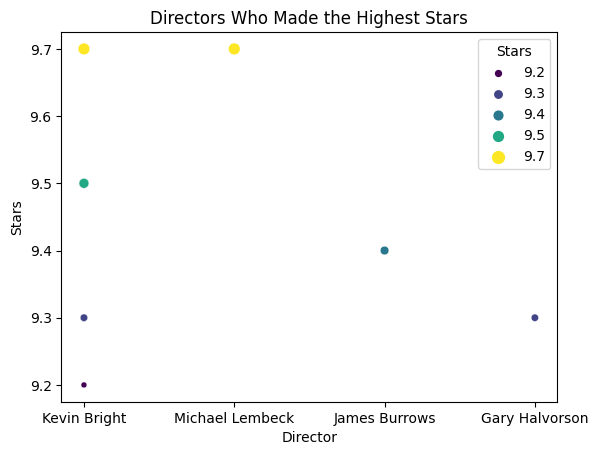

In [20]:
sns.scatterplot(x = "Director", y = "Stars", data =highest_rated_directors,size = "Stars",hue = "Stars",palette="viridis")
plt.title("Directors Who Made the Highest Stars")
plt.show()

<a id = "9"></a>
## Directors Who Made the Most Underrated Stars

In [21]:
most_rated_directors = df[['Stars', 'Director']].sort_values('Stars', ascending=False).tail(10).reset_index(drop = True)
most_rated_directors 

,Stars,Director
0,7.9,Peter Bonerz
1,7.9,Gail Mancuso
2,7.9,Kevin Bright
3,7.9,Peter Bonerz
4,7.8,Ben Weiss
5,7.5,Gary Halvorson
6,7.5,Kevin Bright
7,7.5,Gary Halvorson
8,7.4,Kevin Bright
9,7.2,Peter Bonerz


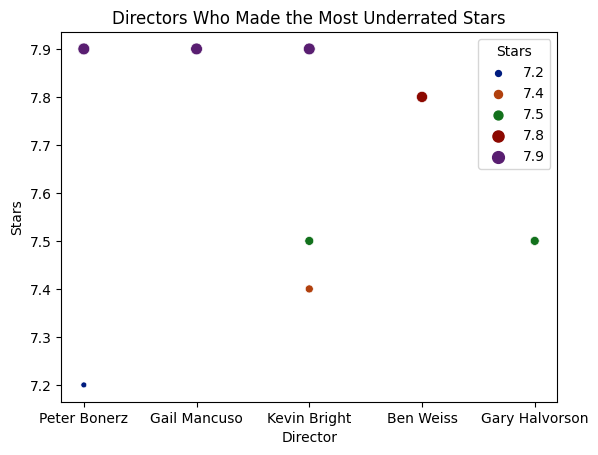

In [22]:
sns.scatterplot(x = "Director", y = "Stars", data =most_rated_directors,size = "Stars",hue = "Stars",palette="dark")
plt.title("Directors Who Made the Most Underrated Stars")
plt.show()

<a id = "10"></a>
## Highest Starring TV Series Episodes

In [23]:
highest_stared_episode = df[['Episode_Title','Episode Number', 'Stars', 'Season']].sort_values('Stars', ascending=False).head(10).reset_index(drop = True)
highest_stared_episode

,Episode_Title,Episode Number,Stars,Season
0,The Last One: Part 2,18,9.7,10
1,The One Where Everybody Finds Out,14,9.7,5
2,The Last One: Part 1,17,9.5,10
3,The One with the Embryos,12,9.5,4
4,The One with the Prom Video,14,9.4,2
5,The One with the Rumor,9,9.3,8
6,The One with the Proposal,25,9.3,6
7,The One with the Videotape,4,9.3,8
8,The One with Ross's Wedding,24,9.2,4
9,The One with Monica and Chandler's Wedding: Pa...,24,9.2,7


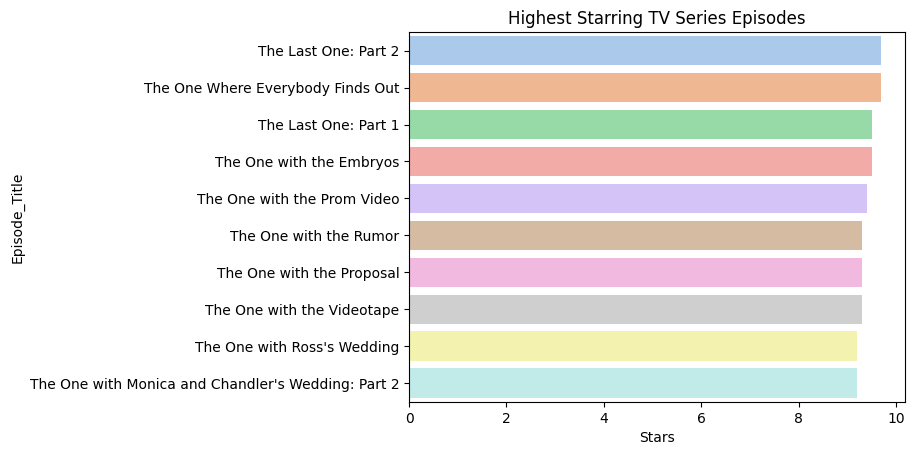

In [24]:
sns.barplot(x = "Stars", y = "Episode_Title",data = highest_stared_episode, palette = "pastel")
plt.title("Highest Starring TV Series Episodes")
plt.show()

* Highest starred episodes: "The Last One: Part 2 and The One Where Everybody Finds Out"

<a id = "11"></a>
## Episodes of TV Series with the Least Starring

In [25]:
most_stared_episode = df[['Episode_Title','Episode Number', 'Stars', 'Season']].sort_values('Stars', ascending=False).tail(10).reset_index(drop = True)
most_stared_episode

,Episode_Title,Episode Number,Stars,Season
0,The One with the Evil Orthodontist,20,7.9,1
1,The One with the Fake Monica,21,7.9,1
2,The One with the Stain,7,7.9,8
3,The One Where They're Going to Party!,9,7.9,4
4,The One with the Donor,22,7.8,9
5,The One with Joey's Interview,19,7.5,8
6,The One with Christmas in Tulsa,10,7.5,9
7,The One with the Vows,21,7.5,7
8,The One with Mac and C.H.E.E.S.E.,20,7.4,6
9,The One with the Invitation,21,7.2,4


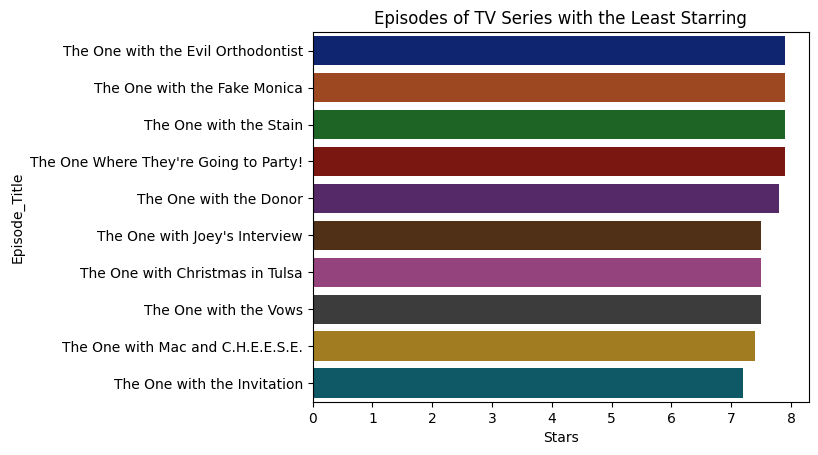

In [26]:
sns.barplot(x = "Stars", y = "Episode_Title",data = most_stared_episode, palette = "dark")
plt.title("Episodes of TV Series with the Least Starring")
plt.show()

* The episode with the lowest stars is "The One with the Invitation"

<a id = "12"></a>
## Episode with the Highest Star and Episode with the Lowest Star

In [27]:
df_rating_unrating = df[(df.loc[:, "Stars"] > 9.6) | (df.loc[:, "Stars"] < 7.3)]
df_rating_unrating

,Year_of_prod,Season,Episode Number,Episode_Title,Duration,Summary,Director,Stars,Votes
93,1998,4,21,The One with the Invitation,22,As Ross and Emily send out wedding invitations...,Peter Bonerz,7.2,3364
110,1999,5,14,The One Where Everybody Finds Out,22,When Phoebe finds out about Monica and Chandle...,Michael Lembeck,9.7,8066
235,2004,10,18,The Last One: Part 2,30,Phoebe races Ross to the airport in a bid to s...,Kevin Bright,9.7,10381


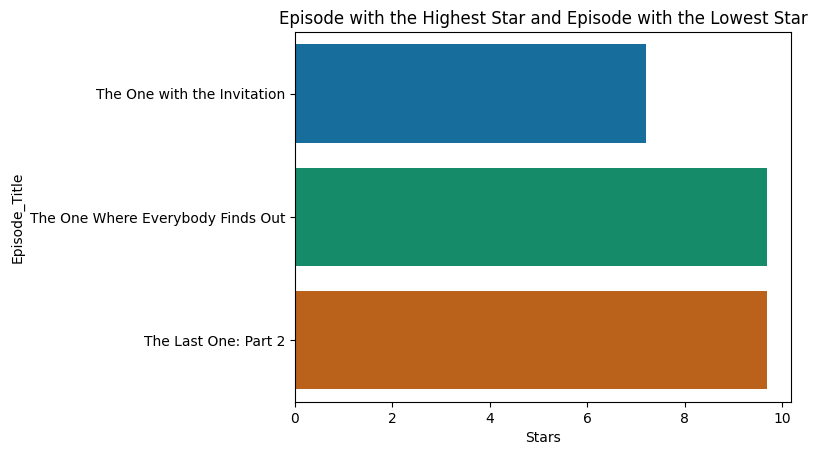

In [28]:
sns.barplot(x = "Stars", y = "Episode_Title", data = df_rating_unrating, palette = "colorblind6" )
plt.title("Episode with the Highest Star and Episode with the Lowest Star")
plt.show()